## **Phần 2: Xây dựng mô hình và tạo ra bảng lịch trình với các ràng buộc nghiêm ngặt (hard constraints)**
*1.Trước tiên, ta sẽ xây dựng các ràng buộc nghiêm ngặt bằng thư viện Goggle Ortool và giải tạo ra một dữ liệu lịch trình* *văn bản in nghiêng*

In [ ]:
pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.2 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.2

In [ ]:
from ortools.sat.python import cp_model
import matplotlib
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Danh sách nhân viên và loại làm việc của họ (full-time hoặc part-time)
employees = {
    "An": "full-time",
    "Binh": "full-time",
    "Chau": "full-time",
    "Duong": "full-time",
    "Linh": "part-time",
    "Kiet": "part-time",
    "Giang": "part-time",
    "Hieu": "part-time"
}

# Số ca làm việc cho mỗi loại nhân viên trong 4 tuần
full_time_shifts = 18
part_time_shifts = 10

# Số ca mỗi ngày (3 ca ngày và 1 ca đêm)
shifts = {"S": 3, "T": 1}

# Số ngày trong 4 tuần
days = range(1, 29)

# Khởi tạo mô hình
model = cp_model.CpModel()

# Khai báo biến  x[employee, day, shift] = 1 nếu nhân viên làm việc vào ngày và ca đó, ngược lại là 0
x = {}
for e in employees:
    for d in days:
        for s in shifts:
            x[(e, d, s)] = model.NewBoolVar(f"shift_{e}_{d}_{s}")

# Ràng buộc: Mỗi ca cần đúng số nhân viên
for d in days:
    for s in shifts:
        model.Add(sum(x[(e, d, s)] for e in employees) == shifts[s])

# Ràng buộc: Mỗi loại nhân viên làm đúng số ca yêu cầu trong 4 tuần
for e in employees:
    if employees[e] == "full-time":
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == full_time_shifts)
    else:
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == part_time_shifts)

# Giải mô hình
solver = cp_model.CpSolver()
status = solver.Solve(model)



# In kết quả
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    schedule = {}
    for d in days:
        schedule[d] = {}
        for e in employees:
            schedule[d][e] = [s for s in shifts if solver.BooleanValue(x[(e, d, s)])]
else:
  print('Không có giải pháp thỏa mãn')


with open('dict.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in schedule.items():
       writer.writerow([key, value])


*2.Tiếp theo, ta sẽ sử dụng dữ liệu giải được để vẽ nên bảng 8×28*


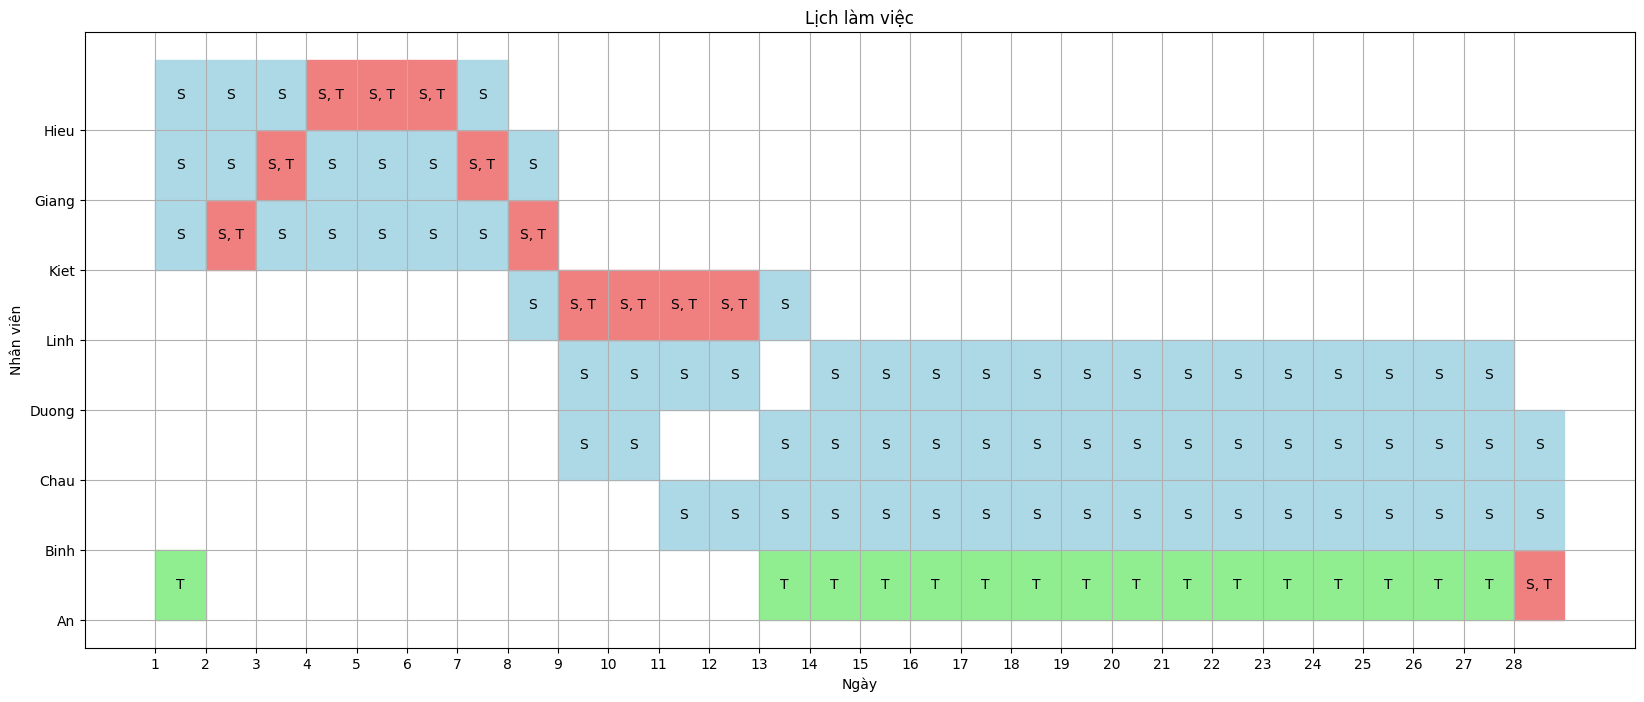

In [ ]:
def taobang(n):
# Đọc file csv
  df = pd.read_csv(n, header=None, index_col=0, converters={1: eval})

  fig, ax = plt.subplots(figsize=(20, 8))



  # Vẽ bảng
  for j, day in enumerate(days):
      if day in df.index:
          day_data = df.loc[day, 1]
          for i, employee in enumerate(employees):
              shifts = day_data.get(employee, [])
              if shifts:
                  if 'S' in shifts and 'T' in shifts:
                      color = 'lightcoral'
                  elif 'S' in shifts:
                      color = 'lightblue'
                  elif 'T' in shifts:
                      color = 'lightgreen'
                  ax.fill_between([j, j+1], [i, i], [i+1, i+1], color=color)
                  text = ', '.join(shifts)
                  ax.text(j+0.5, i+0.5, text, ha='center', va='center')

  # Tạo bảng
  ax.set_yticks(range(len(employees)))
  ax.set_yticklabels(employees)
  ax.set_xticks(range(len(days)))
  ax.set_xticklabels(days)

  plt.title('Lịch làm việc')
  plt.xlabel('Ngày')
  plt.ylabel('Nhân viên')
  plt.grid(True)

  return plt.show()
taobang('dict.csv')

# **Phần 3:Xây dựng mô hình và hàm đánh giá tính tối ưu**
  **3.1 Xây dựng mô hình và tạo ra bảng lịch trình với các ràng buộc không  nghiêm ngặt (soft constraints)**


In [ ]:
# Danh sách nhân viên và loại làm việc của họ (full-time hoặc part-time)
employees = {
    "An": "full-time",
    "Binh": "full-time",
    "Chau": "full-time",
    "Duong": "full-time",
    "Linh": "part-time",
    "Kiet": "part-time",
    "Giang": "part-time",
    "Hieu": "part-time"
}

# Số ca làm việc cho mỗi loại nhân viên trong 4 tuần
full_time_shifts = 18
part_time_shifts = 10

# Số ca mỗi ngày (3 ca ngày và 1 ca đêm)
shifts = {"S": 3, "T": 1}

# Số ngày trong 4 tuần
days = range(1, 29)

# Khởi tạo mô hình
model = cp_model.CpModel()

# Khai báo biến  x[employee, day, shift] = 1 nếu nhân viên làm việc vào ngày và ca đó, ngược lại là 0
x = {}
for e in employees:
    for d in days:
        for s in shifts:
            x[(e, d, s)] = model.NewBoolVar(f"shift_{e}_{d}_{s}")

# Ràng buộc: Mỗi ca cần đúng số nhân viên
for d in days:
    for s in shifts:
        model.Add(sum(x[(e, d, s)] for e in employees) == shifts[s])

# Ràng buộc: Mỗi loại nhân viên làm đúng số ca yêu cầu trong 4 tuần
for e in employees:
    if employees[e] == "full-time":
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == full_time_shifts)
    else:
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == part_time_shifts)
# Ràng buộc soft: Nhân viên không làm cả sáng và tối.
for e in employees:
    for d in days:
        model.Add(x[(e, d, "S")] + x[(e, d, "T")] <= 1)

# Ràng buộc soft: Nhân viên full-time làm một tuần 4-5 ngày, part-time 2-3 ngày
for e in employees:
    if employees[e] == "full-time":
        for k in range(0, 4):
            start_day = 7 * k + 1
            end_day = 7 * k + 8
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) >= 4)
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) <= 5)
    else:
        for k in range(0, 4):
            start_day = 7 * k + 1
            end_day = 7 * k + 8
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) >= 2)
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) <= 3)

# Ràng buộc soft: Nhân viên full-time làm liên tiếp 4-6 ngày, part time làm liên tiếp 2-3 ngày.
y = {}
for e in employees:
    for d in days:
        y[(e, d)] = model.NewBoolVar(f"shifts_{e}_{d}")
        y[(e, d)] = (x[(e, d, "S")] + x[(e, d, "T")]);

for e in employees:
    if employees[e] == "full-time":
        for d in range(1, 23):
            model.Add(sum(y[(e, d + i)] for i in range(0, 7)) <= 6)
        for d in range(2, 26):
            b1 = model.NewBoolVar('')
            b2 = model.NewBoolVar('')
            b3 = model.NewBoolVar('')
            model.Add(y[(e, d)] == 0).OnlyEnforceIf(b1)
            model.Add(y[(e, d - 1)] == 1).OnlyEnforceIf(b2)
            model.Add(y[(e, d)] + y[(e, d + 1)] + y[(e, d + 2)] + y[(e, d + 3)] == 4).OnlyEnforceIf(b3)
            model.AddBoolOr([b1, b2, b3])
        b4 = model.NewBoolVar('')
        b5 = model.NewBoolVar('')
        model.Add(y[(e, 1)] == 0).OnlyEnforceIf(b4)
        model.Add(y[(e, 1)] + y[(e, 2)] + y[(e, 3)] + y[(e, 4)] == 4).OnlyEnforceIf(b5)
        model.AddBoolOr([b4, b5])
    else:
        for d in range(1, 26):
            model.Add(sum(y[(e, d + i)] for i in range(0, 4)) <= 3)
        for d in range(2, 28):
            b1 = model.NewBoolVar('')
            b2 = model.NewBoolVar('')
            b3 = model.NewBoolVar('')
            model.Add(y[(e, d)] == 0).OnlyEnforceIf(b1)
            model.Add(y[(e, d - 1)] == 1).OnlyEnforceIf(b2)
            model.Add(y[(e, d)] + y[(e, d + 1)] == 2).OnlyEnforceIf(b3)
            model.AddBoolOr([b1, b2, b3])
        b4 = model.NewBoolVar('')
        b5 = model.NewBoolVar('')
        model.Add(y[(e, 1)] == 0).OnlyEnforceIf(b4)
        model.Add(y[(e, 1)] + y[(e, 2)] == 2).OnlyEnforceIf(b5)
        model.AddBoolOr([b4, b5])


solver = cp_model.CpSolver()
status = solver.Solve(model)



# In kết quả
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    schedule = {}
    for d in days:
        schedule[d] = {}
        for e in employees:
            schedule[d][e] = [s for s in shifts if solver.BooleanValue(x[(e, d, s)])]
else:
  print('Không có giải pháp thỏa mãn')


with open('dict_1.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in schedule.items():
       writer.writerow([key, value])

*Ta sẽ xây dựng bảng lịch trình dựa vào dữ liệu giải được ở trên*

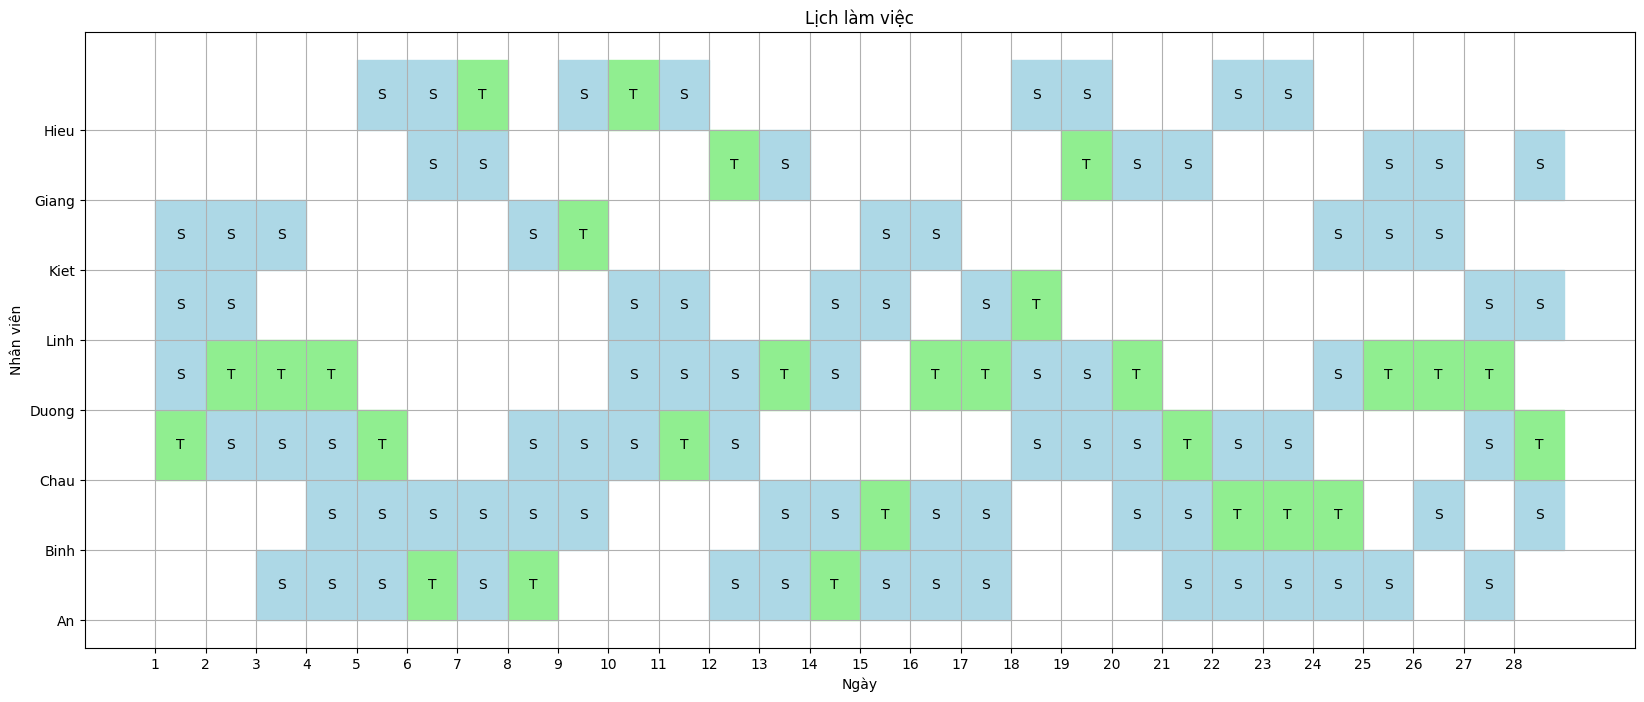

In [ ]:
taobang('dict_1.csv')

*Tiếp theo, ta sẽ sự tương quan giữa số ca ngày và đêm của 8 nhân viên trong 4 tuần.*

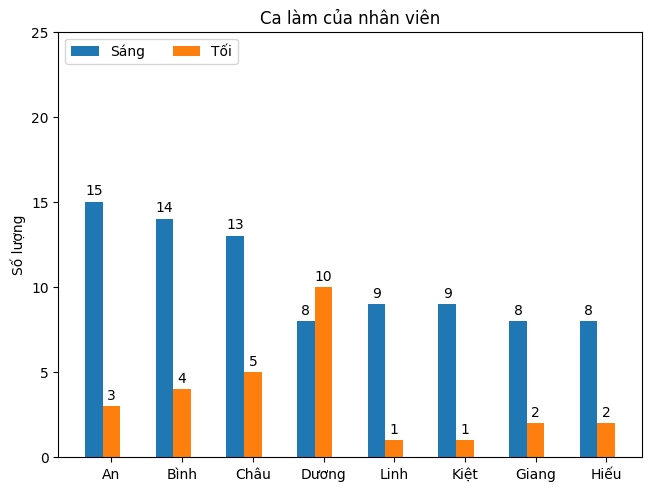

In [ ]:

df = pd.read_csv('dict_1.csv', header=None, index_col=0, converters={1: eval})

schedule_dict = {"An": {"S": 0, "T": 0}, "Binh": {"S": 0, "T": 0}, "Chau": {"S": 0, "T": 0}, "Duong": {"S": 0, "T": 0},
                  "Linh": {"S": 0, "T": 0}, "Kiet": {"S": 0, "T": 0},
                  "Giang": {"S": 0, "T": 0}, "Hieu": {"S": 0, "T": 0}}

for _, row in df.iterrows():
    day_data = row[1]
    for employee, shifts in day_data.items():
        for shift in shifts:
            schedule_dict[employee][shift] += 1


nhanvien = ("An", "Bình", "Châu", "Dương", "Linh", "Kiệt", "Giang", "Hiếu")
thu_vien_lich_trinh = {
    'Sáng': (
        schedule_dict["An"]["S"], schedule_dict["Binh"]["S"], schedule_dict["Chau"]["S"], schedule_dict["Duong"]["S"],
        schedule_dict["Linh"]["S"], schedule_dict["Kiet"]["S"], schedule_dict["Giang"]["S"],
        schedule_dict["Hieu"]["S"]),
    'Tối': (
        schedule_dict["An"]["T"], schedule_dict["Binh"]["T"], schedule_dict["Chau"]["T"], schedule_dict["Duong"]["T"],
        schedule_dict["Linh"]["T"], schedule_dict["Kiet"]["T"], schedule_dict["Giang"]["T"], schedule_dict["Hieu"]["T"]),
}
x = np.arange(len(nhanvien))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in thu_vien_lich_trinh.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Tạo bảng
ax.set_ylabel('Số lượng')
ax.set_title('Ca làm của nhân viên')
ax.set_xticks(x + width, nhanvien)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 25)

plt.show()

**3.2 Xây dựng hàm đánh giá tính tối ưu**

In [ ]:
#Hàm kiểm tra
def cv(x,employees,days,shifts):
      vp = 0; p=0
      z={}
      for e in employees:
          for d in days:
              for s in shifts:
                z[(e, d, s)] = solver.Value(x[(e, d, s)])
      y = {}
      for e in employees:
          for d in days:
              y[(e, d)] = (z[(e, d, "S")]) or (z[(e, d, "T")]);
  #SOFT1: Nhân viên không làm cả sáng và tối.
      for e in employees:
        for d in days:
            p+=1
            if (z[(e, d, "S")] + z[(e, d, "T")] == 2): vp+=1


  #SOFT2: Nhân viên full-time làm một tuần 4-5 ngày, part-time 2-3 ngày
      for e in employees:
          if employees[e] == "full-time":
              for k in range(0, 4):
                  start_day = 7 * k + 1
                  end_day = 7 * k + 8
                  p+=1
                  if (sum(y[(e, d)] for d in range(start_day, end_day) ) < 4): vp+=1
                  if (sum(y[(e, d)] for d in range(start_day, end_day) ) > 5): vp+=1
          else:
              for k in range(0, 4):
                  start_day = 7 * k + 1
                  end_day = 7 * k + 8
                  p+=1
                  if (sum(y[(e, d)] for d in range(start_day, end_day)) < 2): vp+=1
                  if (sum(y[(e, d)] for d in range(start_day, end_day)) > 3): vp+=1

    #SOFT3:Một chuỗi ngày liên tiếp làm việc của nhân viên full-time sẽ làm việc 4 đến 6 ngày,trong khi con số này của nhân viên part-time sẽ là 2 đến 3 ngày
      for e in employees:
          if employees[e] == "full-time":
              for d in range(2, 23):
                if (y[e,d]==1) and (y[e,d-1]==0):
                  p+=1
                  if (sum(y[(e, d + i)] for i in range(0, 7)) > 6) or (y[(e, d)] + y[(e, d + 1)] + y[(e, d + 2)] + y[(e, d + 3)] < 4 ):
                    vp+=1
              for d in range(23, 26):
                if (y[e,d]==1) and (y[e,d-1]==0):
                  p+=1
                  if (y[(e, d)] + y[(e, d + 1)] + y[(e, d + 2)] + y[(e, d + 3)] < 4 ):
                    vp+=1
              if (y[e,1]==1):
                p+=1
                if (sum(y[(e, 1 + i)] for i in range(0, 7)) > 6) or (y[(e, 1)] + y[(e, 1 + 1)] + y[(e, 1+ 2)] + y[(e, 1 + 3)] < 4 ):
                    vp+=1
          else:
              for d in range(2, 26):
                if (y[e,d]==1) and (y[e,d-1]==0):
                  p+=1
                  if (sum(y[(e, d + i)] for i in range(0, 4)) > 3) or (y[(e, d)] + y[(e, d + 1)] < 2 ):
                    vp+=1
              for d in range(26, 28):
                if (y[e,d]==1) and (y[e,d-1]==0):
                  p+=1
                  if (y[(e, d)] + y[(e, d + 1)]< 2 ):
                    vp+=1
              if (y[e,1]==1):
                p+=1
                if (sum(y[(e, 1 + i)] for i in range(0, 4)) > 3) or (y[(e, 1)] + y[(e,2)] <2 ):
                    vp+=1
      return str(vp)+'/'+str(p)+'='+str(vp/p)


*Sau đó, ta sẽ sinh ngẫu nhiên các lịch trình thoả mãn các ràng buộc nghiêm ngặt để khảo sát tính tối ưu giữa chúng (output của mỗi lần chạy code là khác nhau,chúng tôi sẽ lấy dự liệu từ lần chạy code của mình)*

In [ ]:

# Danh sách nhân viên và loại làm việc của họ (full-time hoặc part-time)
employees = {
    "An": "full-time",
    "Binh": "full-time",
    "Chau": "full-time",
    "Duong": "full-time",
    "Linh": "part-time",
    "Kiet": "part-time",
    "Giang": "part-time",
    "Hieu": "part-time"
}

# Số ca làm việc cho mỗi loại nhân viên trong 4 tuần
full_time_shifts = 18
part_time_shifts = 10

# Số ca mỗi ngày (3 ca ngày và 1 ca đêm)
shifts = {"S": 3, "T": 1}

# Số ngày trong 4 tuần
days = range(1, 29)

# Khởi tạo mô hình
model = cp_model.CpModel()

# Biến quyết định: x[employee, day, shift] = 1 nếu nhân viên làm việc vào ngày và ca đó, ngược lại là 0
x = {}
for e in employees:
    for d in days:
        for s in shifts:
            x[(e, d, s)] = model.NewBoolVar(f"shift_{e}_{d}_{s}")

# Ràng buộc: Mỗi ca ngày cần đúng số nhân viên
for d in days:
    for s in shifts:
        model.Add(sum(x[(e, d, s)] for e in employees) == shifts[s])

# Ràng buộc: Mỗi nhân viên làm đúng số ca yêu cầu trong 4 tuần
for e in employees:
    if employees[e] == "full-time":
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == full_time_shifts)
    else:
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == part_time_shifts)



# Thêm đoạn mã sau vào trước khi giải model
solver = cp_model.CpSolver()
solver.parameters.num_search_workers = 8 # Tăng số lượng luồng tìm kiếm
model.AddDecisionStrategy([x[(e, d, s)] for e in employees for d in days for s in shifts],
                         cp_model.CHOOSE_FIRST, cp_model.SELECT_MIN_VALUE)

# Thay thế phần giải model và in kết quả bằng đoạn mã sau:
solutions = []
solver = cp_model.CpSolver()
solver.parameters.num_search_workers = 8 # Tăng số lượng luồng tìm kiếm
for i in range(3):
    status = solver.Solve(model)
    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
      solution = {}
      for d in days:
          solution[d] = {}
          for e in employees:
              solution[d][e] = [s for s in shifts if solver.BooleanValue(x[(e, d, s)])]
      solutions.append(solution)
      print(f'Bảng ngẫu nhiên thứ ',i+1,'là:', cv(x, employees,days,shifts))
        # Thêm ràng buộc để loại bỏ giải pháp hiện tại khỏi các tìm kiếm tiếp theo
      model.Add(sum(x[(e, d, s)] for e in employees for d in days for s in shifts
                      if solver.BooleanValue(x[(e, d, s)]) == True) <=
                  sum(x[(e, d, s)] for e in employees for d in days for s in shifts) - 1)
    else:
        break

for i, solution in enumerate(solutions):
    with open(f'schedule_{i+1}.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in solution.items():
            writer.writerow([key, value])







Bảng ngẫu nhiên thứ  1 là: 63/307=0.20521172638436483
Bảng ngẫu nhiên thứ  2 là: 67/309=0.2168284789644013
Bảng ngẫu nhiên thứ  3 là: 67/312=0.21474358974358973


# **Phần 4: Các giải pháp khác**
Để phát triển bài toán và lịch trình khiến cho nó thêm thực tế, ta sẽ xây dựng thêm một số ràng buộc khác, từ đó tạo ra một bảng hoàn chỉnh.

In [ ]:
# Danh sách nhân viên và loại làm việc của họ (full-time hoặc part-time)
employees = {
    "An": "full-time",
    "Binh": "full-time",
    "Chau": "full-time",
    "Duong": "full-time",
    "Linh": "part-time",
    "Kiet": "part-time",
    "Giang": "part-time",
    "Hieu": "part-time"
}

# Số ca làm việc cho mỗi loại nhân viên trong 4 tuần
full_time_shifts = 18
part_time_shifts = 10

# Số ca mỗi ngày (3 ca ngày và 1 ca đêm)
shifts = {"S": 3, "T": 1}

# Số ngày trong 4 tuần
days = range(1, 29)

# Khởi tạo mô hình
model = cp_model.CpModel()

# Biến quyết định: x[employee, day, shift] = 1 nếu nhân viên làm việc vào ngày và ca đó, ngược lại là 0
x = {}
for e in employees:
    for d in days:
        for s in shifts:
            x[(e, d, s)] = model.NewBoolVar(f"shift_{e}_{d}_{s}")

# Ràng buộc: Mỗi ca ngày cần đúng số nhân viên
for d in days:
    for s in shifts:
        model.Add(sum(x[(e, d, s)] for e in employees) == shifts[s])

# Ràng buộc: Mỗi nhân viên làm đúng số ca yêu cầu trong 4 tuần
for e in employees:
    if employees[e] == "full-time":
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == full_time_shifts)
    else:
        model.Add(sum(x[(e, d, s)] for d in days for s in shifts) == part_time_shifts)

# Ràng buộc soft: Nhân viên không làm cả sáng và tối.
for e in employees:
    for d in days:
        model.Add(x[(e, d, "S")] + x[(e, d, "T")] <= 1)

# Ràng buộc soft: Nhân viên full-time làm một tuần 4-5 ngày, part-time 2-3 ngày
for e in employees:
    if employees[e] == "full-time":
        for k in range(0, 4):
            start_day = 7 * k + 1
            end_day = 7 * k + 8
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) >= 4)
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) <= 5)
    else:
        for k in range(0, 4):
            start_day = 7 * k + 1
            end_day = 7 * k + 8
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) >= 2)
            model.Add(sum(x[(e, d, s)] for d in range(start_day, end_day) for s in shifts) <= 3)

# Ràng buộc soft: Nhân viên full-time làm liên tiếp 4-6 ngày, part time làm liên tiếp 2-3 ngày.
y = {}
for e in employees:
    for d in days:
        y[(e, d)] = model.NewBoolVar(f"shifts_{e}_{d}")
        y[(e, d)] = (x[(e, d, "S")] + x[(e, d, "T")]);

for e in employees:
    if employees[e] == "full-time":
        for d in range(1, 23):
            model.Add(sum(y[(e, d + i)] for i in range(0, 7)) <= 6)
        for d in range(2, 26):
            b1 = model.NewBoolVar('')
            b2 = model.NewBoolVar('')
            b3 = model.NewBoolVar('')
            model.Add(y[(e, d)] == 0).OnlyEnforceIf(b1)
            model.Add(y[(e, d - 1)] == 1).OnlyEnforceIf(b2)
            model.Add(y[(e, d)] + y[(e, d + 1)] + y[(e, d + 2)] + y[(e, d + 3)] == 4).OnlyEnforceIf(b3)
            model.AddBoolOr([b1, b2, b3])
        b4 = model.NewBoolVar('')
        b5 = model.NewBoolVar('')
        model.Add(y[(e, 1)] == 0).OnlyEnforceIf(b4)
        model.Add(y[(e, 1)] + y[(e, 2)] + y[(e, 3)] + y[(e, 4)] == 4).OnlyEnforceIf(b5)
        model.AddBoolOr([b4, b5])
    else:
        for d in range(1, 26):
            model.Add(sum(y[(e, d + i)] for i in range(0, 4)) <= 3)
        for d in range(2, 28):
            b1 = model.NewBoolVar('')
            b2 = model.NewBoolVar('')
            b3 = model.NewBoolVar('')
            model.Add(y[(e, d)] == 0).OnlyEnforceIf(b1)
            model.Add(y[(e, d - 1)] == 1).OnlyEnforceIf(b2)
            model.Add(y[(e, d)] + y[(e, d + 1)] == 2).OnlyEnforceIf(b3)
            model.AddBoolOr([b1, b2, b3])
        b4 = model.NewBoolVar('')
        b5 = model.NewBoolVar('')
        model.Add(y[(e, 1)] == 0).OnlyEnforceIf(b4)
        model.Add(y[(e, 1)] + y[(e, 2)] == 2).OnlyEnforceIf(b5)
        model.AddBoolOr([b4, b5])

#Tiếp tục triển khai thêm các soft contrainst
#Một ngày luôn có 1 nhân viên full time làm việc ca sáng
for d in days:
    model.Add(sum(x[(e, d, "S")] for e in {"An","Binh","Chau","Duong"}) >= 1)
#điều kiện full-time làm 4-5 ca đêm, part-time làm 2-3 ca đêm
for e in employees:
    if employees[e] == "full-time":
      model.Add(sum(x[e,d,'T'] for d in days) >=4)
      model.Add(sum(x[e,d,'T'] for d in days) <=5)
    else:
      model.Add(sum(x[e,d,'T'] for d in days) >=2)
      model.Add(sum(x[e,d,'T'] for d in days) <=3)

#Không ai làm 2 ca đêm liên tục
for e in employees:
    for d in range(1,28):
        model.Add(x[(e, d, "T")] + x[(e, d+1, "T")] <= 1)


# Giải mô hình
solver = cp_model.CpSolver()
status = solver.Solve(model)



# In kết quả
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    schedule = {}
    for d in days:
        schedule[d] = {}
        for e in employees:
            schedule[d][e] = [s for s in shifts if solver.BooleanValue(x[(e, d, s)])]
else:
  print('Không có giải pháp thỏa mãn')


with open('dict_2.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in schedule.items():
       writer.writerow([key, value])

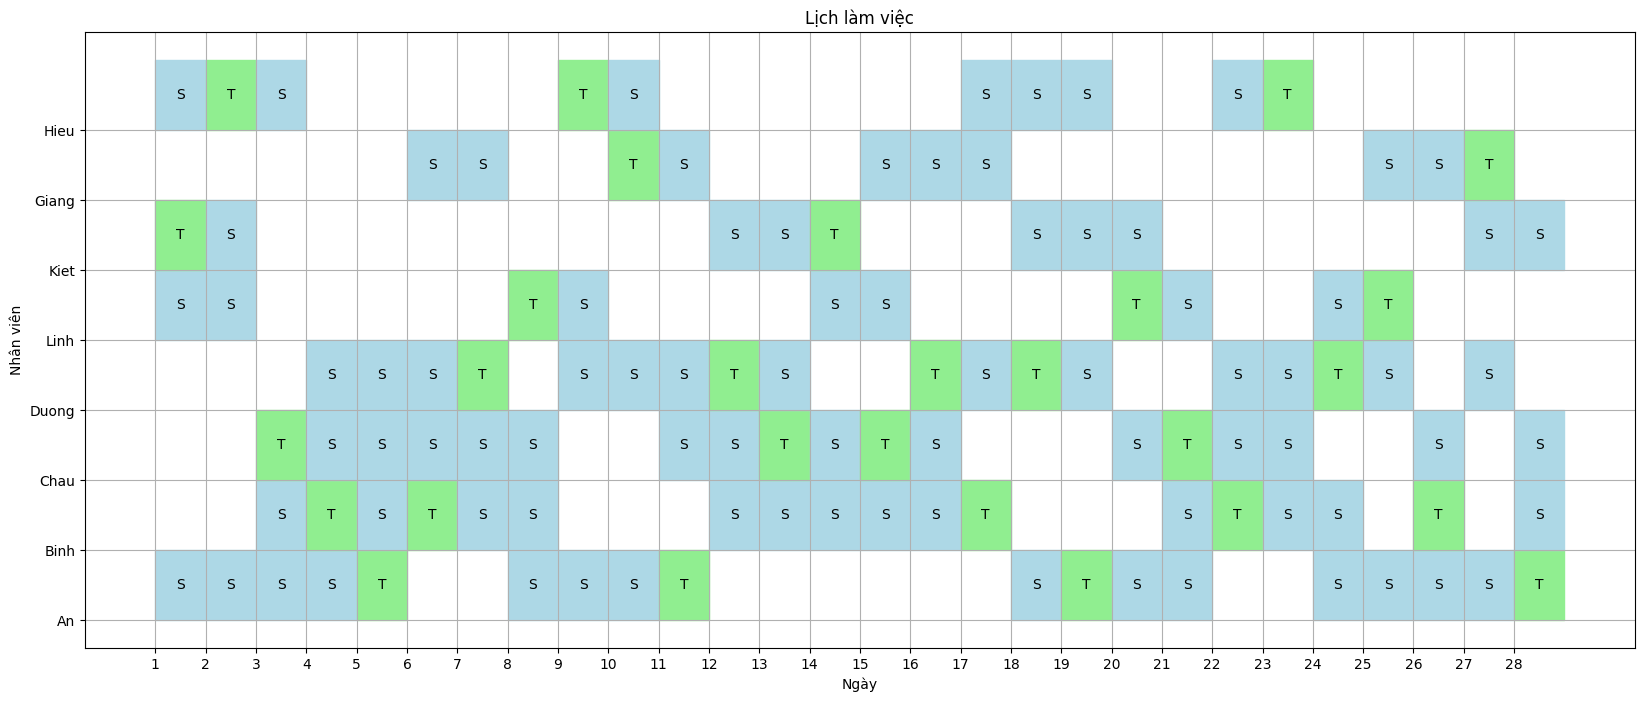

In [ ]:
taobang('dict_2.csv')